Cluster's Center

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
Count of each cluster
{0: 2773, 1: 696, 2: 104, 3: 427}


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Inertia

719601.1096991902
Data with clusters

            mean_dist_day  mean_over_speed_perc  cluster
id                                                      
3423311935          71.24                    28        3
3423313212          52.53                    25        3
3423313724          64.54                    27        3
3423311373          55.69                    22        3
3423310999          54.58                    25        3
...                   ...                   ...      ...
3423310685         160.04                    10        1
3423312600         176.17                     5        1
3423312921         170.91                    12        1
3423313630         176.14                     5        1
3423311533         168.03                     9        1

[4000 rows x 3 columns]


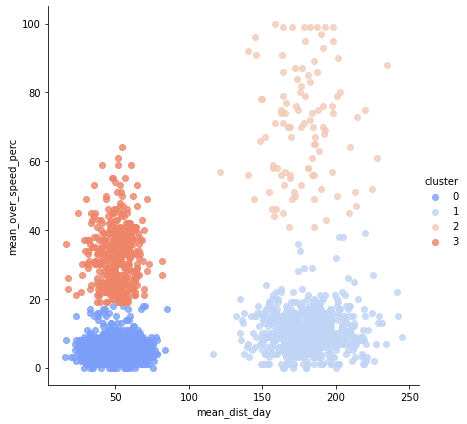

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

kmeans = KMeans(n_clusters=4)

kmeans.fit(data)

print("Cluster's Center\n")
print(kmeans.cluster_centers_)


# Find count of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
print("Count of each cluster")
print(dict_data)


# Plot the clusters
data["cluster"] = kmeans.labels_
sns.lmplot('mean_dist_day', 'mean_over_speed_perc', data=data,
           hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)


# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)
print("Inertia\n")
print(kmeans.inertia_)


# Print the data
print("Data with clusters\n")
print(data)
